## Ejercicio 3: 

Crea un script que genere 5 secuencias de 5 nucleótidos de forma aleatoria, que queden almacenadas en un archivo FASTA. 

A partir de ahí, cargue el archivo FASTA y genera los correspondientes árboles utilizando el método de máxima parsimonia y el método de distancia (selecciona la distancia que desees, y emplea UPGMA y el método Neighboor Joining). Compara los árboles/resultados y desarrolla alguna conclusión.

In [139]:
import random
from Bio import AlignIO, Phylo
from generators.generatorTree import GeneratorTreeFactory
import matplotlib.pyplot as plt
import pandas as pd
from itertools import combinations
import numpy as np

## 1. Generación de secuencias aleatorias

In [3]:
def generar_secuencia(longitud):
    nucleotidos = ['A', 'T', 'C', 'G']
    return ''.join(random.choice(nucleotidos) for _ in range(longitud))

def crear_fasta(nombre_archivo, num_secuencias, longitud):
    with open(nombre_archivo, 'w') as archivo:
        for i in range(1, num_secuencias + 1):
            secuencia = generar_secuencia(longitud)
            archivo.write(f">Secuencia_{i}\n")
            archivo.write(f"{secuencia}\n")

In [4]:
nombre_archivo = "./fasta_files/secuencias.fasta"
num_secuencias = 5
longitud_secuencia = 5

crear_fasta(nombre_archivo, num_secuencias, longitud_secuencia)

print(f"Archivo {nombre_archivo} generado con {num_secuencias} secuencias de {longitud_secuencia} nucleótidos.")

Archivo ./fasta_files/secuencias.fasta generado con 5 secuencias de 5 nucleótidos.


## 2. Generación de árboles mediante el método de máxima parsimonia

In [102]:
def cargar_fasta(nombre_archivo):
    return AlignIO.read(nombre_archivo, "fasta")

In [103]:
nombre_archivo = "./fasta_files/secuencias.fasta"
sequences = cargar_fasta(nombre_archivo)

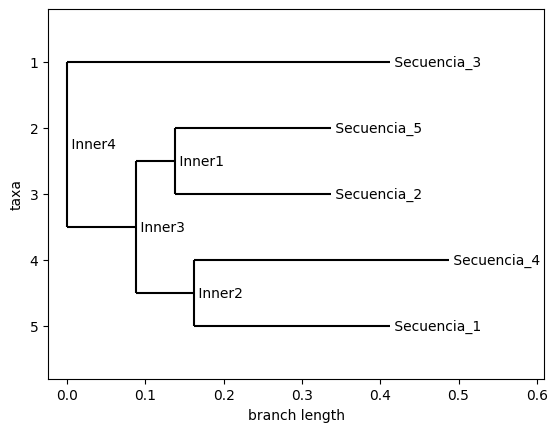

In [104]:
generator = GeneratorTreeFactory().initialize_generator('ParsimoniaTree')
tree_parsimonia = generator.generate_tree(sequences)
generator.show_tree(tree_parsimonia)

## 3. Generación de árboles mediante el método de distancia

In [105]:
generator = GeneratorTreeFactory().initialize_generator('DistanceTree')

### 3.1 UPGMA - Unweighted Pair Group Method with Arithmetic mean

#### 3.1.1. Cálculo de la distancia como la proporción de posiciones no idénticas entre dos secuencias - `identity`

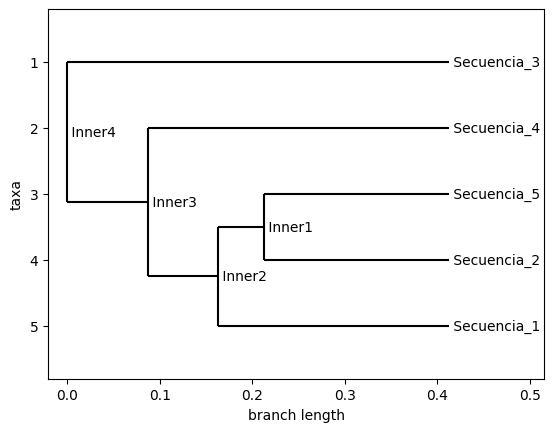

In [106]:
tree_upgma_identity = generator.generate_tree_upgma(sequences, 'identity')
generator.show_tree(tree_upgma_identity)

#### 3.1.2. Cálculo de la distancia utilizando herramientas como BLAST para determinar una distancia basada en alineamientos entre las secuencias. - `blastn`

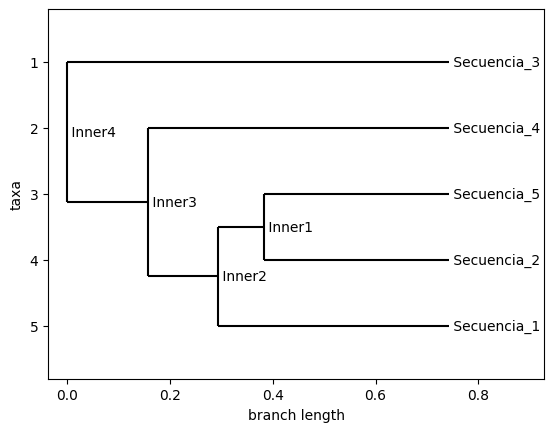

In [107]:
tree_upgma_blastn = generator.generate_tree_upgma(sequences, 'blastn')
generator.show_tree(tree_upgma_blastn)

#### 3.1.3. Cálculo de la distancia utilizando una matriz de puntuación para transiciones y transversiones que influye en cómo se calculan las distancias entre secuencias - `trans`

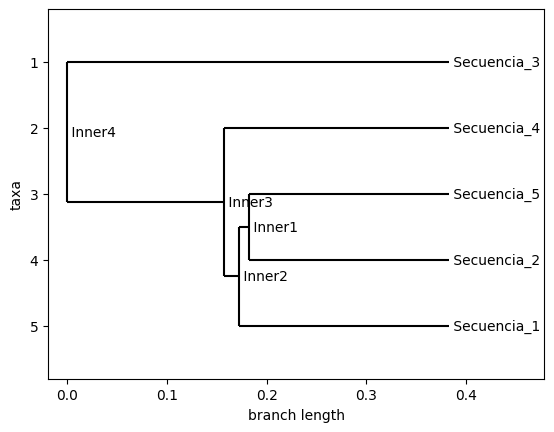

In [108]:
tree_upgma_trans = generator.generate_tree_upgma(sequences, 'trans')
generator.show_tree(tree_upgma_trans)

### 3.2 NJ - Neighboor Joining

#### 3.2.1. Cálculo de la distancia como la proporción de posiciones no idénticas entre dos secuencias - `identity`

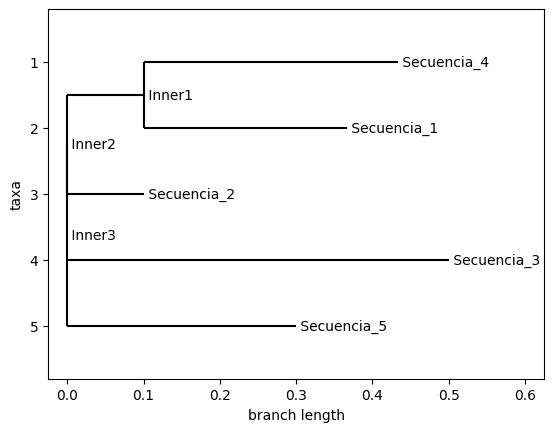

In [109]:
tree_nj_identitiy = generator.generate_tree_nj(sequences, 'identity')
generator.show_tree(tree_nj_identitiy)

#### 3.2.2. Cálculo de la distancia utilizando herramientas como BLAST para determinar una distancia basada en alineamientos entre las secuencias. - `blastn`

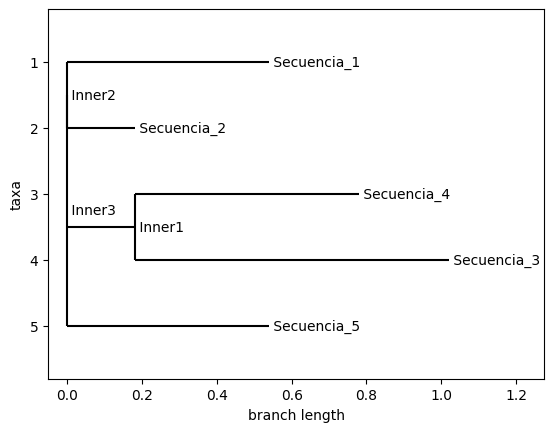

In [110]:
tree_nj_blastn = generator.generate_tree_nj(sequences, 'blastn')
generator.show_tree(tree_nj_blastn)

#### 3.2.3. Cálculo de la distancia utilizando una matriz de puntuación para transiciones y transversiones que influye en cómo se calculan las distancias entre secuencias - `trans`

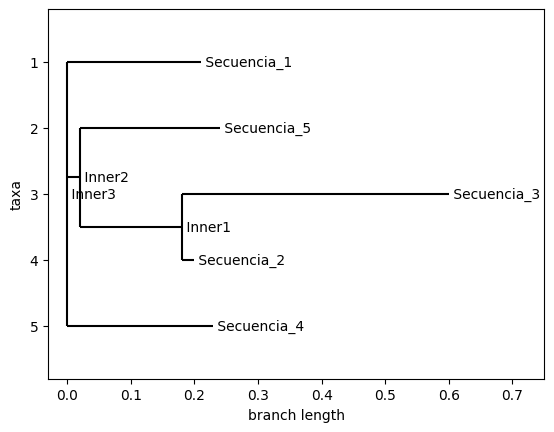

In [111]:
tree_nj_trans = generator.generate_tree_nj(sequences, 'trans')
generator.show_tree(tree_nj_trans)

## 4. Comparación de los árboles/resultados y conclusiones

### 4.1. Comparación de los ancestros comunes

In [112]:
sequences_names = {"Secuencia_1": "A", "Secuencia_2": "B", "Secuencia_3": "C", "Secuencia_4": "D", "Secuencia_5": "E"}

In [113]:
def generate_internal_label(clade):
    descendant_names = sorted([term.name for term in clade.get_terminals() if term.name])
    return f"{''.join(descendant_names)}"

def change_labels(tree, sequences_names):
    for leaf in tree.get_terminals():
        if leaf.name in sequences_names:
            leaf.name = sequences_names[leaf.name]
    
    for clade in tree.find_clades():
        if clade.is_terminal():
            continue
        clade.name = generate_internal_label(clade)
    return tree

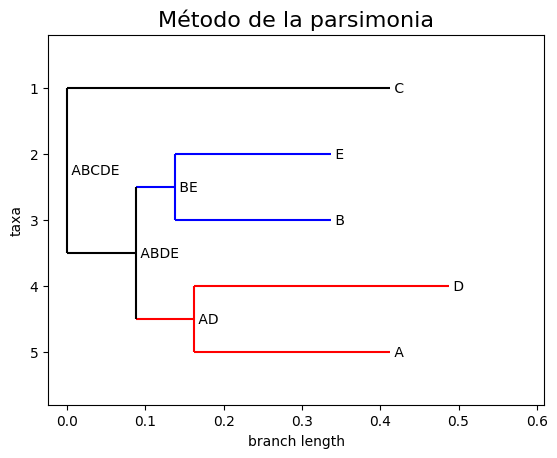

In [114]:
tree_parsimonia = change_labels(tree_parsimonia, sequences_names)

mrca = tree_parsimonia.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

mrca = tree_parsimonia.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'

fig, ax = plt.subplots()

Phylo.draw(tree_parsimonia, do_show=False, axes=ax)
ax.set_title("Método de la parsimonia", fontsize=16)

plt.show()

In [115]:
tree_upgma_identity = change_labels(tree_upgma_identity, sequences_names)
mrca = tree_upgma_identity.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_upgma_identity.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

tree_upgma_blastn = change_labels(tree_upgma_blastn, sequences_names)
mrca = tree_upgma_blastn.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_upgma_blastn.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

tree_upgma_trans = change_labels(tree_upgma_trans, sequences_names)
mrca = tree_upgma_trans.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_upgma_trans.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

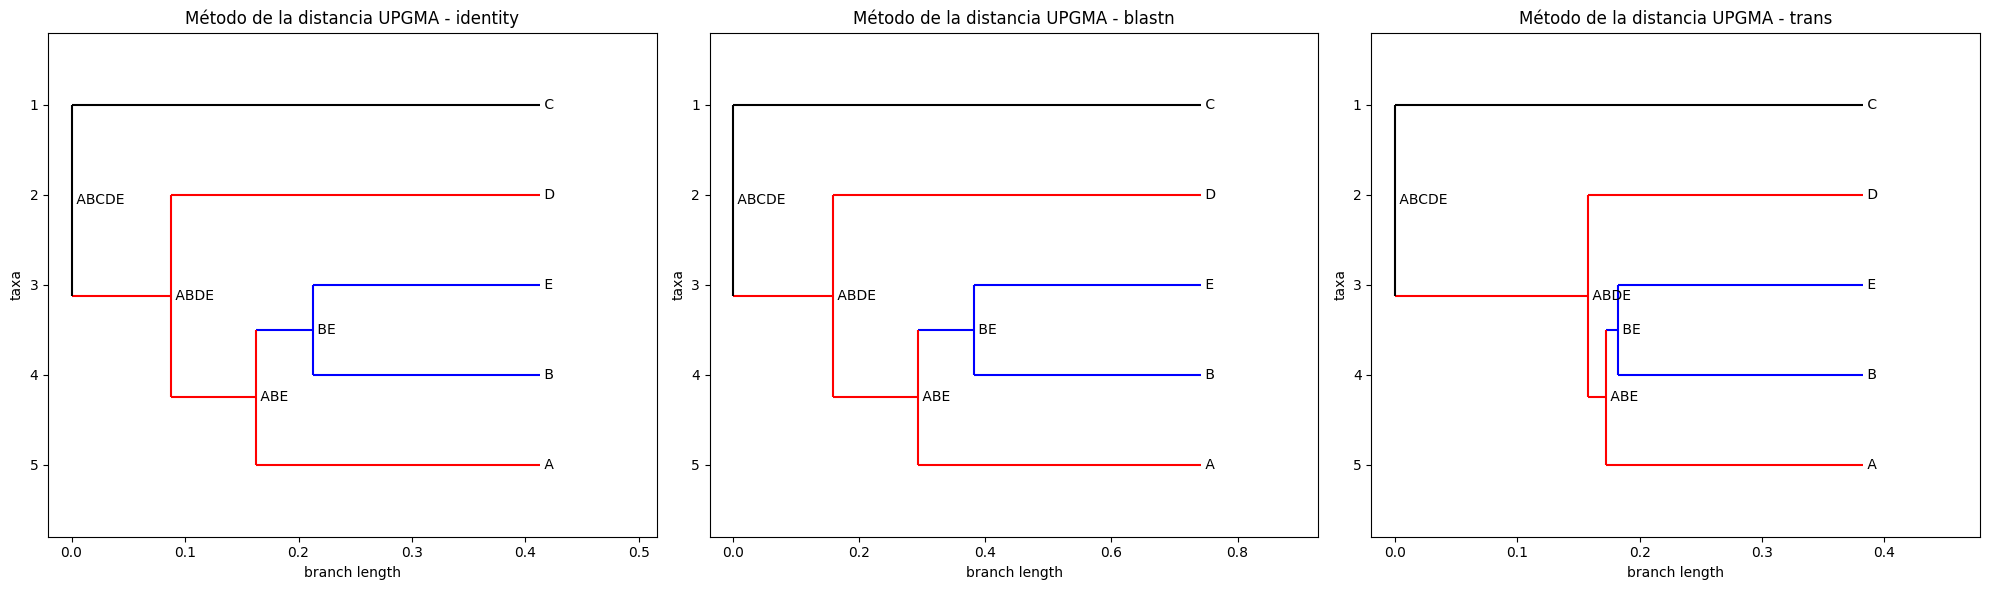

In [116]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

Phylo.draw(tree_upgma_identity, do_show=False, axes=axes[0])
axes[0].set_title("Método de la distancia UPGMA - identity", fontsize=12)

Phylo.draw(tree_upgma_blastn, do_show=False, axes=axes[1])
axes[1].set_title("Método de la distancia UPGMA - blastn", fontsize=12)

Phylo.draw(tree_upgma_trans, do_show=False, axes=axes[2])
axes[2].set_title("Método de la distancia UPGMA - trans", fontsize=12)

plt.tight_layout()
plt.show()

In [117]:
tree_nj_identitiy = change_labels(tree_nj_identitiy, sequences_names)
mrca = tree_nj_identitiy.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_nj_identitiy.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

tree_nj_blastn = change_labels(tree_nj_blastn, sequences_names)
mrca = tree_nj_blastn.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'orange'
mrca = tree_nj_blastn.common_ancestor({"name": "C"}, {"name": "D"})
mrca.color = 'green'

tree_nj_trans = change_labels(tree_nj_trans, sequences_names)
mrca = tree_nj_trans.common_ancestor({"name": "B"}, {"name": "E"})
mrca.color = 'blue'
mrca = tree_nj_trans.common_ancestor({"name": "A"}, {"name": "D"})
mrca.color = 'red'

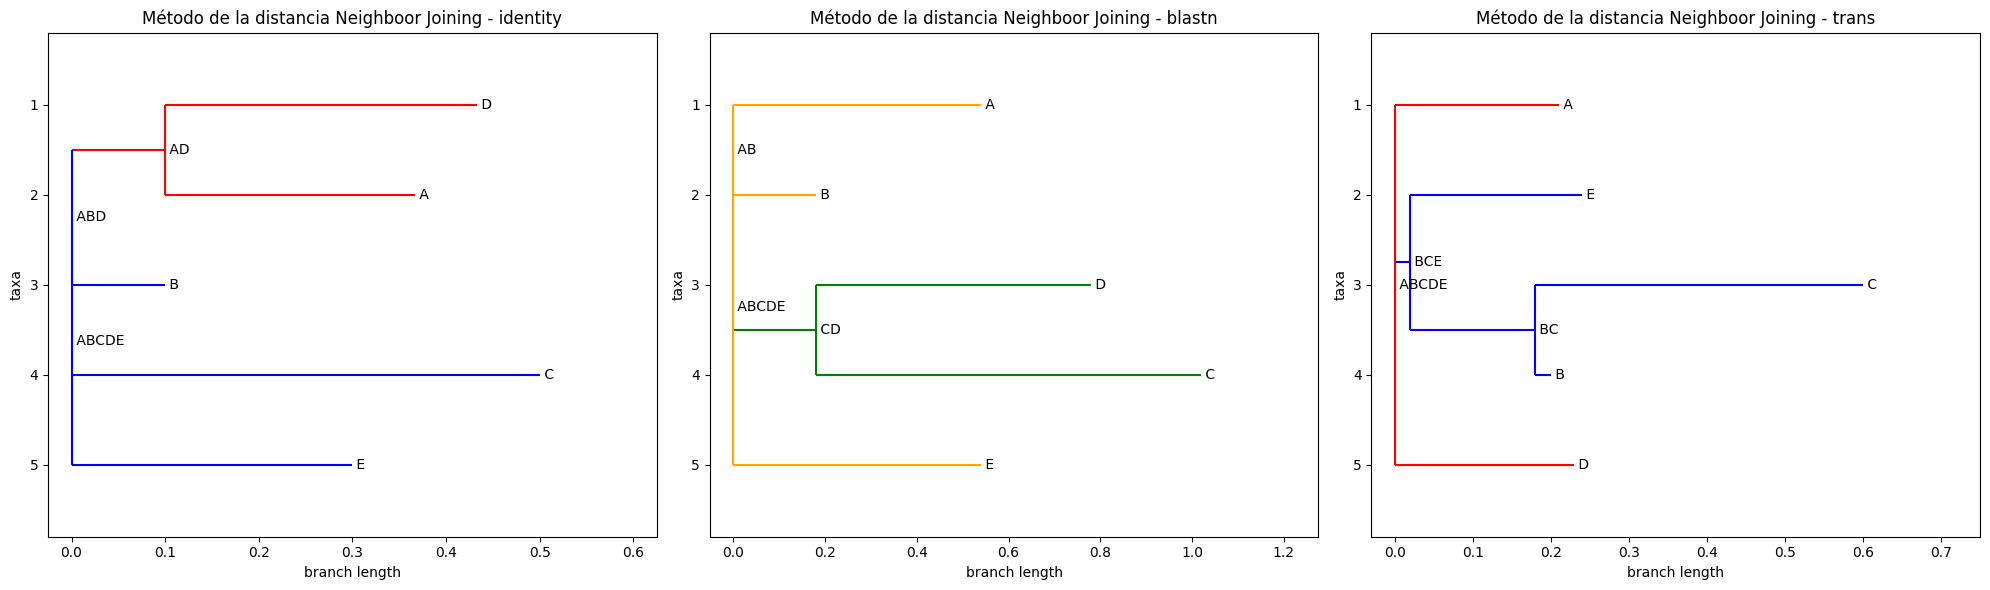

In [118]:
fig, axes = plt.subplots(1, 3, figsize=(20, 6))

Phylo.draw(tree_nj_identitiy, do_show=False, axes=axes[0])
axes[0].set_title("Método de la distancia Neighboor Joining - identity", fontsize=12)

Phylo.draw(tree_nj_blastn, do_show=False, axes=axes[1])
axes[1].set_title("Método de la distancia Neighboor Joining - blastn", fontsize=12)

Phylo.draw(tree_nj_trans, do_show=False, axes=axes[2])
axes[2].set_title("Método de la distancia Neighboor Joining - trans", fontsize=12)

plt.tight_layout()
plt.show()

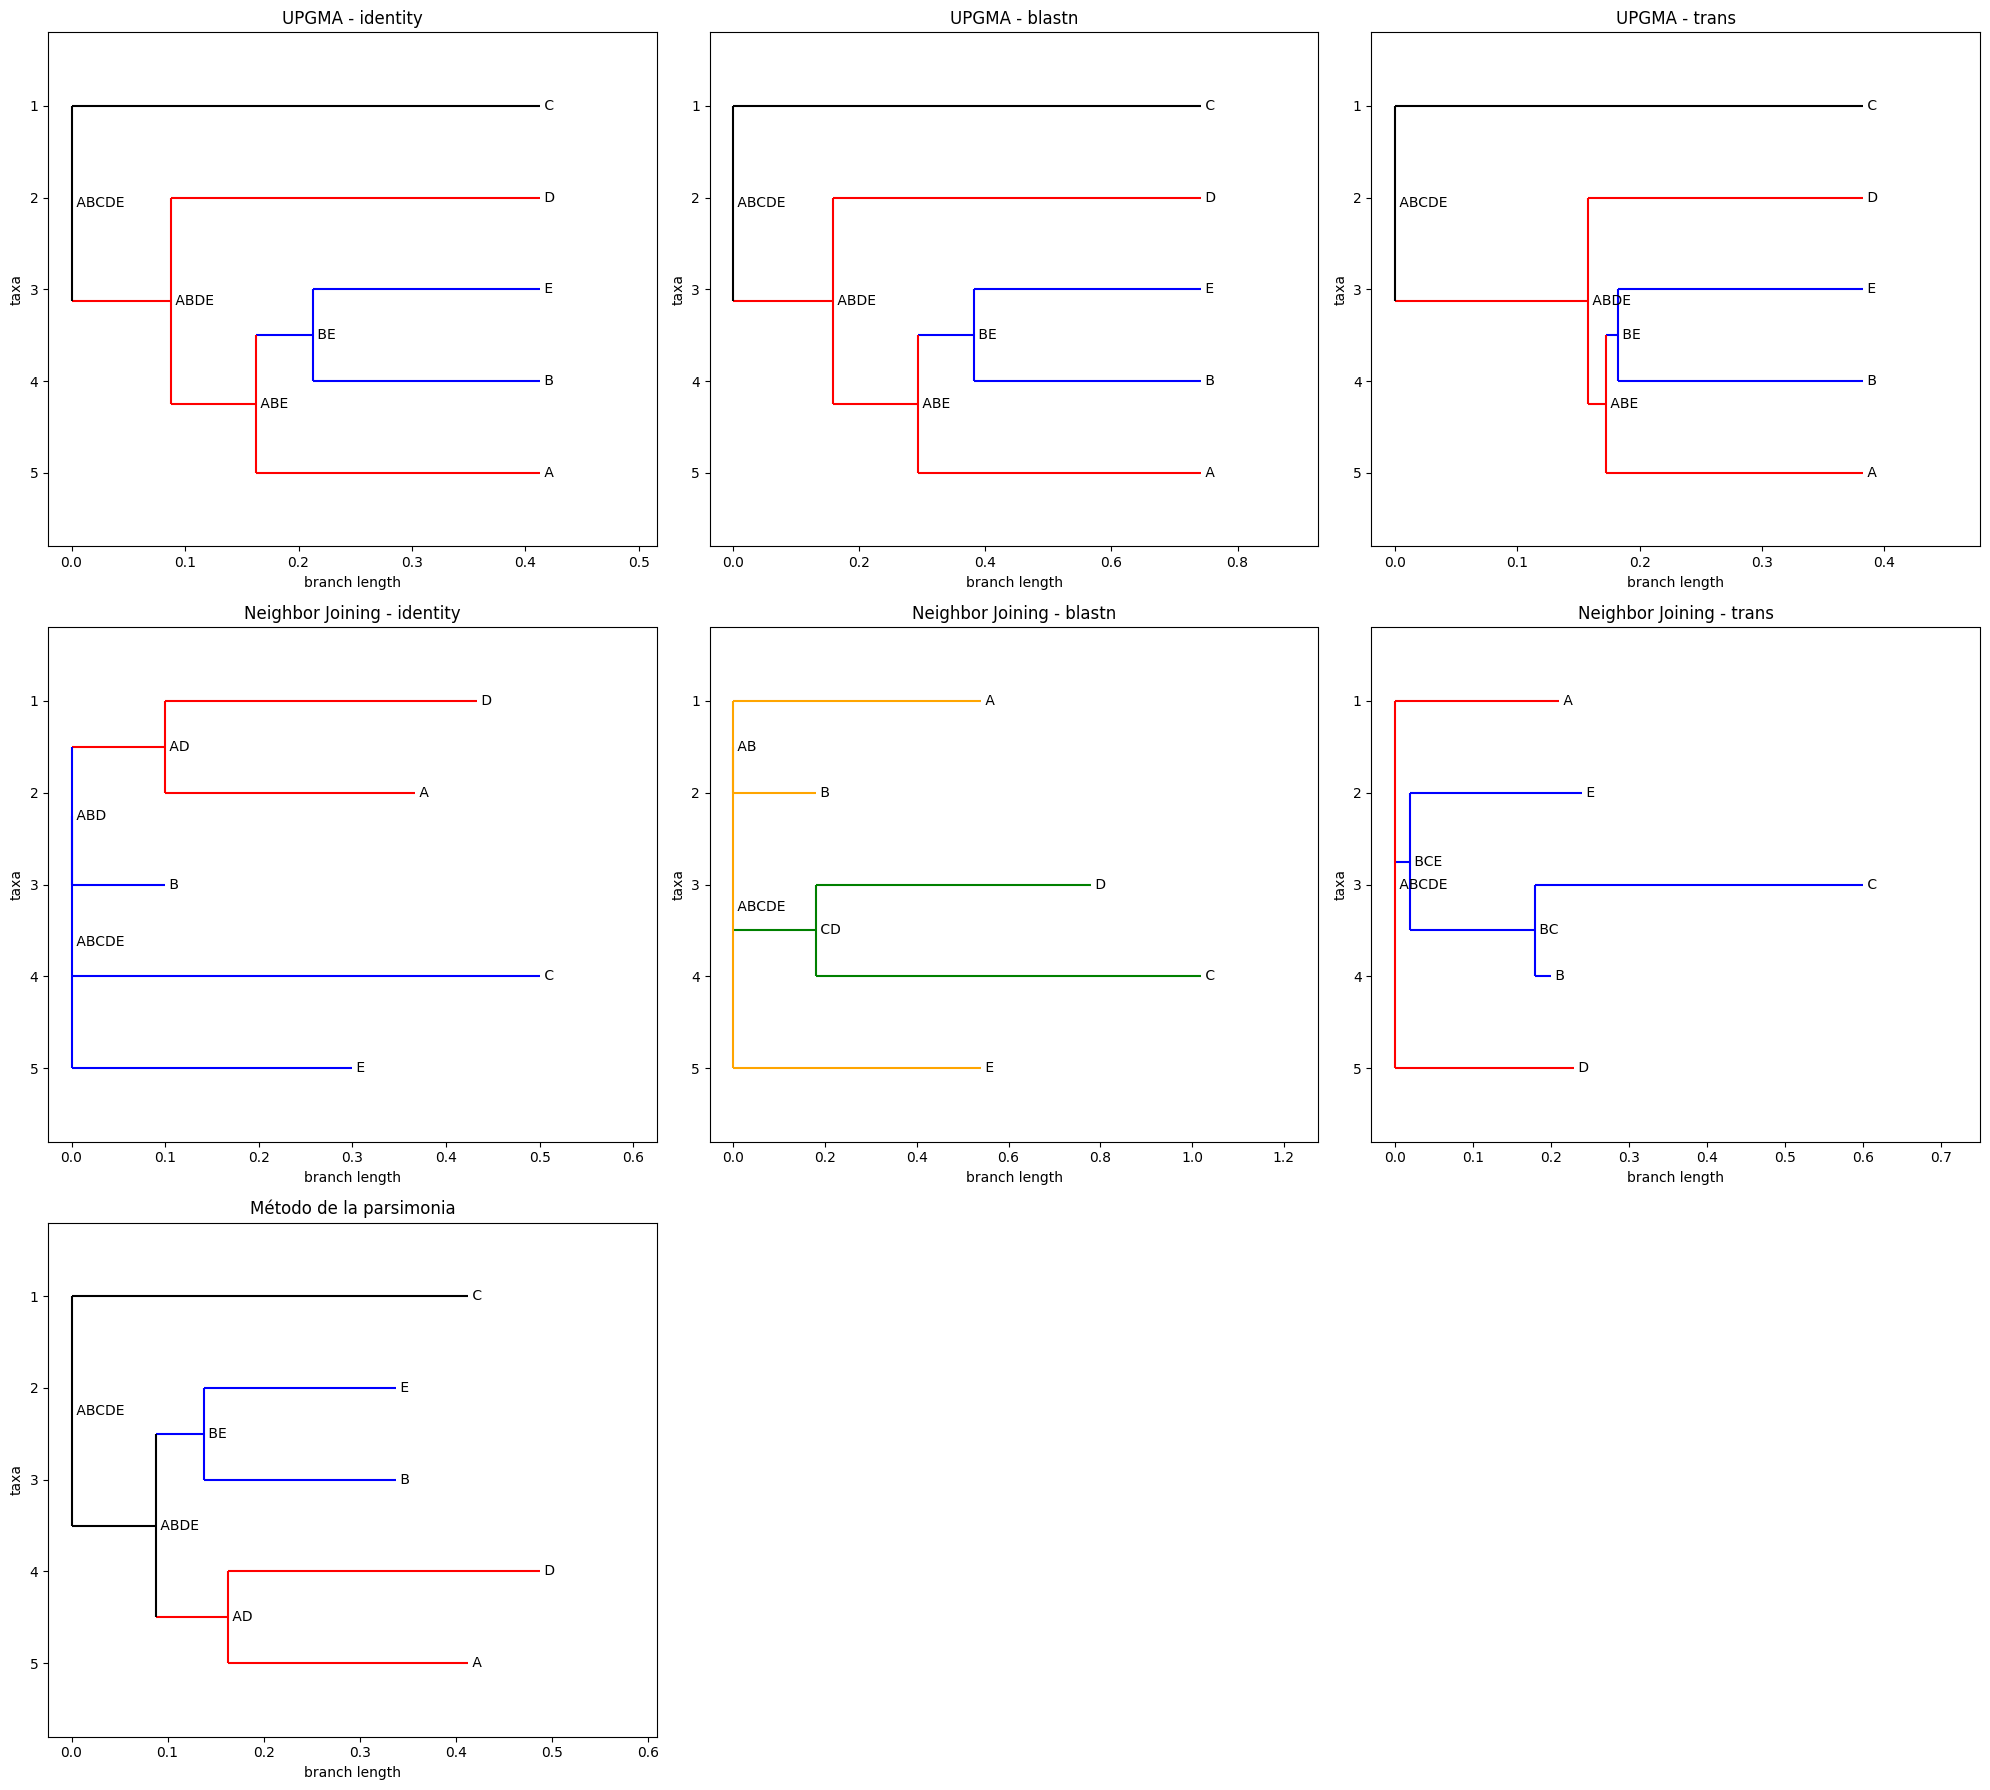

In [119]:
fig, axes = plt.subplots(3, 3, figsize=(20, 18))

# Gráficas del método de distancia UPGMA
Phylo.draw(tree_upgma_identity, do_show=False, axes=axes[0, 0])
axes[0, 0].set_title("UPGMA - identity", fontsize=12)

Phylo.draw(tree_upgma_blastn, do_show=False, axes=axes[0, 1])
axes[0, 1].set_title("UPGMA - blastn", fontsize=12)

Phylo.draw(tree_upgma_trans, do_show=False, axes=axes[0, 2])
axes[0, 2].set_title("UPGMA - trans", fontsize=12)

# Gráficas del método Neighbor Joining
Phylo.draw(tree_nj_identitiy, do_show=False, axes=axes[1, 0])
axes[1, 0].set_title("Neighbor Joining - identity", fontsize=12)

Phylo.draw(tree_nj_blastn, do_show=False, axes=axes[1, 1])
axes[1, 1].set_title("Neighbor Joining - blastn", fontsize=12)

Phylo.draw(tree_nj_trans, do_show=False, axes=axes[1, 2])
axes[1, 2].set_title("Neighbor Joining - trans", fontsize=12)

# Gráfica del árbol del método de parsimonia
Phylo.draw(tree_parsimonia, do_show=False, axes=axes[2, 0])
axes[2, 0].set_title("Método de la parsimonia", fontsize=12)

axes[2, 1].axis('off')
axes[2, 2].axis('off')
plt.tight_layout()
plt.show()

**Conclusiones**
1. **Comparación entre métodos**:
   - El método de la parsimonia se enfoca en la minimización de cambios evolutivos y puede ser útil cuando se trabaja con datos filogenéticos bien entendidos y simples.
   - Los métodos de distancia (UPGMA y Neighbor Joining) proporcionan árboles que reflejan similitudes cuantificables basadas en las distancias calculadas, pero pueden ser sensibles al tipo de distancia empleada.

2. **Variabilidad entre distancias**:
   - Las distancias utilizadas (identity, blastn, trans) afectan directamente las agrupaciones observadas en el método *Neighboor Joining*. Sin embargo, en cuanto al método *UPGMA*, únicamente afecta a la medida de distancias y no a sus agrupaciones. Esto sugiere que la elección de la distancia es crucial y puede influir en las conclusiones derivadas de los árboles.

3. **Robustez de Neighbor Joining**:
   - Neighbor Joining, al no asumir una tasa constante de evolución, puede ser más adecuado para datos con variaciones significativas en las tasas evolutivas.

4. **Limitaciones**:
   - UPGMA asume un reloj molecular (tasa constante de evolución), lo que puede no ser aplicable en ciertos contextos evolutivos, introduciendo sesgos en los agrupamientos.
   - Parsimonia, aunque eficiente, puede perder precisión cuando las tasas de evolución son muy altas o las secuencias son muy divergentes.

En definitiva, la elección del método depende del objetivo del análisis. Para árboles rápidos basados en similitudes, UPGMA puede ser útil, mientras que Neighbor Joining es más robusto frente a variaciones evolutivas. Es importante combinar los resultados de varios métodos y distancias para obtener una visión integral de las relaciones evolutivas.

### 4.2. Comparación de medidas numéricas

#### 4.2.1 Longitud total del árbol

La longitud total del árbol es la suma de todas las longitudes de las ramas. Esto puede interpretarse como una medida de la divergencia acumulada entre las secuencias.

In [120]:
def total_branch_length(tree):
    return sum(branch.branch_length for branch in tree.get_nonterminals() + tree.get_terminals() if branch.branch_length)

#### 4.2.2 Profundidad máxima (altura del árbol)

La profundidad máxima del árbol mide la distancia evolutiva máxima desde la raíz hasta cualquier nodo terminal. Es útil para comparar niveles de divergencia.

In [121]:
def max_depth(tree):
    return max(tree.depths().values())

#### 4.2.3 Longitud promedio de las ramas

La longitud promedio de las ramas te da una idea del grado promedio de divergencia entre los nodos.

In [122]:
def average_branch_length(tree):
    branch_lengths = [branch.branch_length for branch in tree.get_nonterminals() + tree.get_terminals() if branch.branch_length]
    return sum(branch_lengths) / len(branch_lengths)

#### 4.2.4 Número de nodos internos y terminales

El número de nodos internos y hojas (terminales) puede describir la complejidad y resolución del árbol.

In [123]:
def num_internal_nodes(tree):
    return len(tree.get_nonterminals())

def num_terminal_nodes(tree):
    return len(tree.get_terminals())

#### 4.2.5 Balance del árbol
El balance del árbol mide la simetría entre las ramas. Árboles muy desbalanceados pueden indicar una alta disparidad en las tasas evolutivas entre los linajes.


In [124]:
def compute_balance(tree):
    from collections import Counter
    leaf_counts = [len(clade.get_terminals()) for clade in tree.get_nonterminals()]
    balance = Counter(leaf_counts)
    return str(balance)

#### 4.2.6 Distancia promedio entre nodos terminales

La distancia promedio entre nodos terminales mide la divergencia promedio entre todas las secuencias.

In [125]:
def average_terminal_distance(tree):
    distances = []
    for clade1, clade2 in combinations(tree.get_terminals(), 2):
        mrca = tree.common_ancestor(clade1, clade2)
        distances.append(tree.distance(mrca, clade1) + tree.distance(mrca, clade2))
    return sum(distances) / len(distances)

#### 4.2.7 Número de bifurcaciones (topología)

El número de bifurcaciones en el árbol puede proporcionar información sobre la resolución del árbol y los posibles puntos de especiación.


In [126]:
def num_bifurcations(tree):
    return len(tree.get_nonterminals())

#### 4.2.8 Ultralinearidad del árbol (solo UPGMA)

Se verifica si el árbol UPGMA es ultramétrico, es decir, si todas las hojas tienen la misma distancia desde la raíz.

In [127]:
def is_ultrametric(tree):
    depths = [tree.distance(tree.root, terminal) for terminal in tree.get_terminals()]
    return len(set(depths)) == 1

#### 4.2.9 Presentación de las métricas

In [165]:
metricas = pd.DataFrame()

trees = {
    "Parsimonia": tree_parsimonia,
    "UPGMA - Identity": tree_upgma_identity,
    "UPGMA - Blastn": tree_upgma_blastn,
    "UPGMA - Trans": tree_upgma_trans,
    "NJ - Identity": tree_nj_identitiy,
    "NJ - Blastn": tree_nj_blastn,
    "NJ - Trans": tree_nj_trans
}

metricas = {
    "Longitud Total del Árbol": total_branch_length,
    "Profundidad Máxima": max_depth,
    "Longitud Promedio de Ramas": average_branch_length,
    "Número de Nodos Internos": num_internal_nodes,
    "Número de Nodos Terminales": num_terminal_nodes,
    "Balance del Árbol": compute_balance,
    "Distancia Promedio entre Terminales": average_terminal_distance,
    "Número de Bifurcaciones": num_bifurcations,
    "Es Ultramétrico": is_ultrametric
}

df_metricas = pd.DataFrame(index=metricas.keys(), columns=trees.keys())

for metodo, tree in trees.items():
    for metrica, func in metricas.items():
        try:
            df_metricas.loc[metrica, metodo] = func(tree)
        except Exception as e:
            df_metricas.loc[metrica, metodo] = f"Error: {e}"

In [136]:
display(df_metricas)

,Parsimonia,UPGMA - Identity,UPGMA - Blastn,UPGMA - Trans,NJ - Identity,NJ - Blastn,NJ - Trans
Longitud Total del Árbol,1.6,1.6,2.88,1.4,1.6,2.88,1.28
Profundidad Máxima,0.4875,0.4125,0.7425,0.3825,0.5,1.02,0.6
Longitud Promedio de Ramas,0.2,0.2,0.36,0.175,0.266667,0.411429,0.182857
Número de Nodos Internos,4,4,4,4,3,3,3
Número de Nodos Terminales,5,5,5,5,5,5,5
Balance del Árbol,"Counter({2: 2, 5: 1, 4: 1})","Counter({5: 1, 4: 1, 3: 1, 2: 1})","Counter({5: 1, 4: 1, 3: 1, 2: 1})","Counter({5: 1, 4: 1, 3: 1, 2: 1})","Counter({5: 1, 3: 1, 2: 1})","Counter({2: 2, 5: 1})","Counter({5: 1, 3: 1, 2: 1})"
Distancia Promedio entre Terminales,0.665,0.665,1.197,0.565,0.66,1.188,0.548
Número de Bifurcaciones,4,4,4,4,3,3,3
Es Ultramétrico,False,True,True,True,False,False,False


#### 4.2.10 Visualización de las métricas

**1. Longitud del árbol y longitud promedio de ramas**

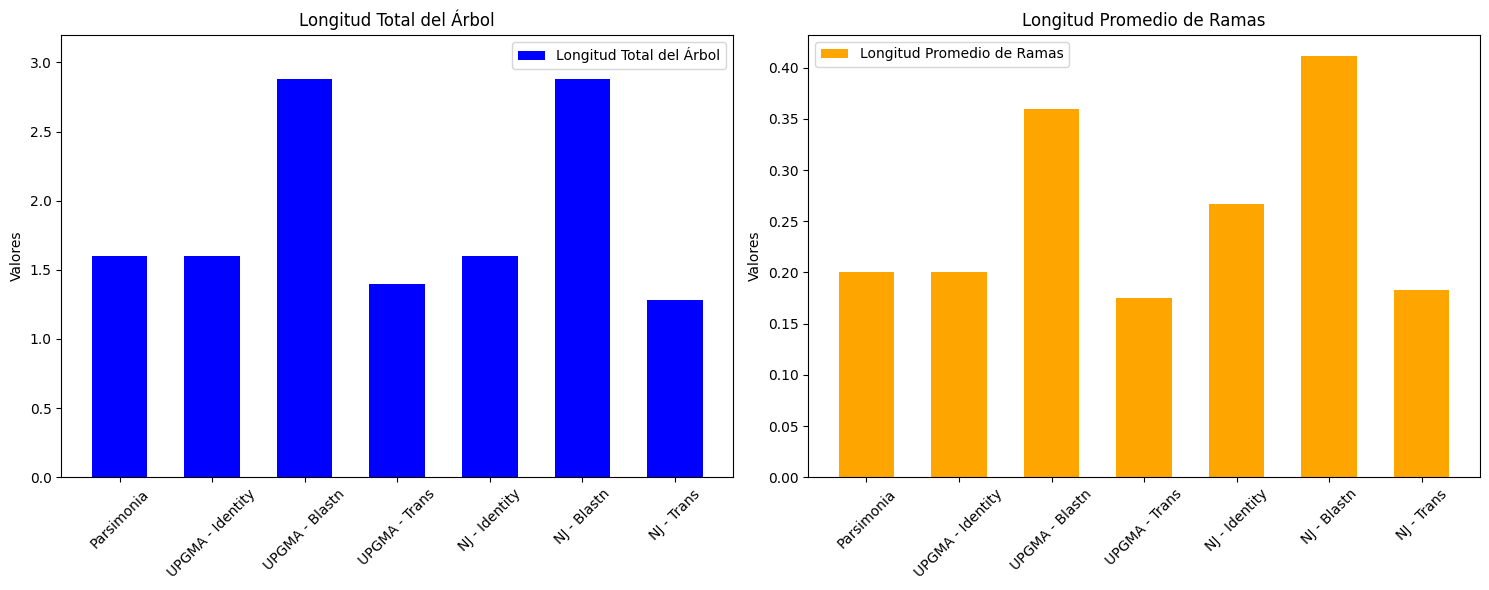

In [154]:
longitudes = df_metricas.loc["Longitud Total del Árbol"].astype(float)
longitudes_promedio = df_metricas.loc["Longitud Promedio de Ramas"].astype(float)

fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 6))

x1 = range(len(longitudes))
ax1.bar(x1, longitudes, width=0.6, label="Longitud Total del Árbol", color="blue")
ax1.set_xticks(x1)
ax1.set_xticklabels(longitudes.index, rotation=45)
ax1.set_ylabel("Valores")
ax1.set_title("Longitud Total del Árbol")
ax1.set_ylim(0, 3.2)
ax1.legend()

x2 = range(len(longitudes_promedio))
ax2.bar(x2, longitudes_promedio, width=0.6, label="Longitud Promedio de Ramas", color="orange")
ax2.set_xticks(x2)
ax2.set_xticklabels(longitudes_promedio.index, rotation=45)
ax2.set_ylabel("Valores")
ax2.set_title("Longitud Promedio de Ramas")
ax2.legend()

plt.tight_layout()
plt.show()


1. **Métodos basados en Blastn (UPGMA y NJ)**: Tienden a construir árboles con mayor longitud total y promedio de ramas, lo que sugiere que estas distancias reflejan divergencias evolutivas mayores o un modelo más sensible a cambios sutiles entre las secuencias.

2. **Métodos Trans (UPGMA y NJ)**: Tienden a generar árboles más compactos, lo que podría reflejar menor divergencia entre las secuencias analizadas o un modelo menos sensible.

3. **Parsimonia**:Este método busca minimizar los cambios evolutivos, lo cual se refleja en las longitudes moderadas y en las longitudes promedio de las ramas.

4. **Comparación UPGMA vs. NJ**: Aunque ambos métodos construyen árboles basados en distancias, NJ parece producir árboles con mayores longitudes promedio, especialmente en el caso de Blastn.

En general, las diferencias en la longitud total y promedio reflejan cómo cada método interpreta y representa las relaciones evolutivas entre las secuencias. Los métodos como Parsimonia son más conservadores, mientras que Blastn tiende a maximizar las distancias.

**2. Profundidad máxima**

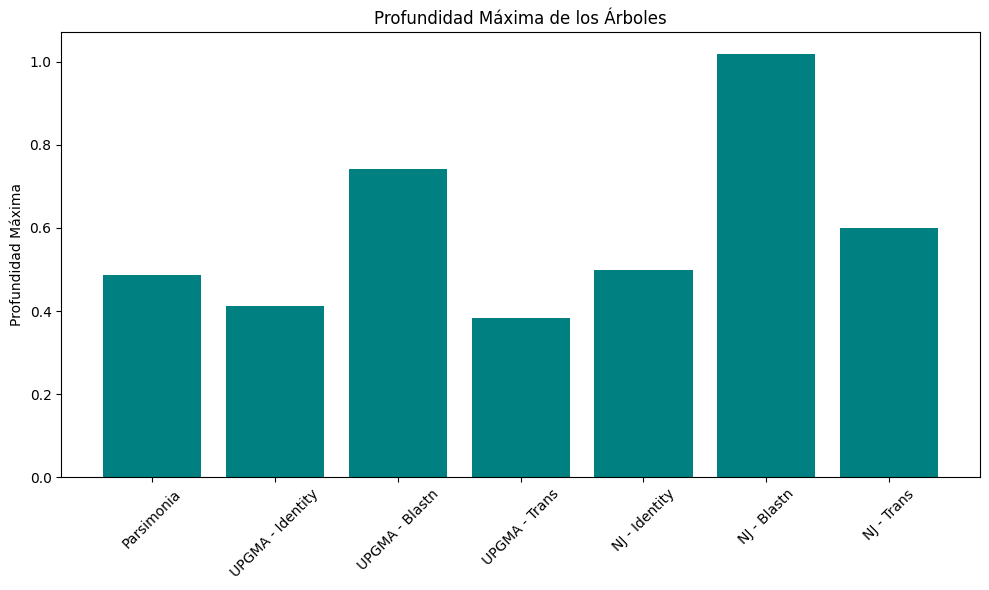

In [155]:
profundidad_maxima = df_metricas.loc["Profundidad Máxima"].astype(float)

plt.figure(figsize=(10, 6))
plt.bar(profundidad_maxima.index, profundidad_maxima, color="teal")
plt.ylabel("Profundidad Máxima")
plt.title("Profundidad Máxima de los Árboles")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

El gráfico muestra la **profundidad máxima** alcanzada por los árboles generados mediante diferentes métodos filogenéticos. Se destacan las siguientes observaciones:

1. **Métodos NJ - Blastn y UPGMA - Blastn**: Estos métodos generan árboles con las mayores profundidades máximas. Esto indica que las distancias entre las secuencias terminales y la raíz del árbol son mayores, lo cual podría ser el resultado de una mayor variabilidad evolutiva reflejada en los datos procesados por el algoritmo Blastn.

2. **Métodos UPGMA - Identity, NJ - Identity y UPGMA - Trans**: Generan árboles con profundidades significativamente menores en comparación con los métodos Blastn. Esto sugiere que los datos utilizados en estos métodos reflejan menor divergencia acumulada desde la raíz hasta los nodos terminales.

3. **Método Parsimonia**: La profundidad máxima de este método es moderada y se encuentra ligeramente por encima de UPGMA - Identity. Esto es consistente con el enfoque del método, que busca minimizar los cambios evolutivos necesarios para construir el árbol.

4. **Comparación general**: Los métodos basados en **Blastn** tienden a construir árboles más profundos, lo que podría reflejar una interpretación más detallada de las diferencias evolutivas entre las secuencias. Por otro lado, los métodos basados en **Identity** y **Trans** producen árboles más compactos, posiblemente debido a un enfoque más conservador o menos sensible a pequeñas variaciones.

En resumen, la profundidad máxima es un indicador clave de la divergencia evolutiva reflejada en los árboles, y los métodos Blastn parecen ser los más sensibles para capturar esta variabilidad, mientras que los métodos como Parsimonia y UPGMA - Identity se enfocan en representaciones más compactas y directas. Esto destaca la influencia del modelo y la distancia utilizada en la construcción de los árboles.

**3. Número de nodos internos y terminales**

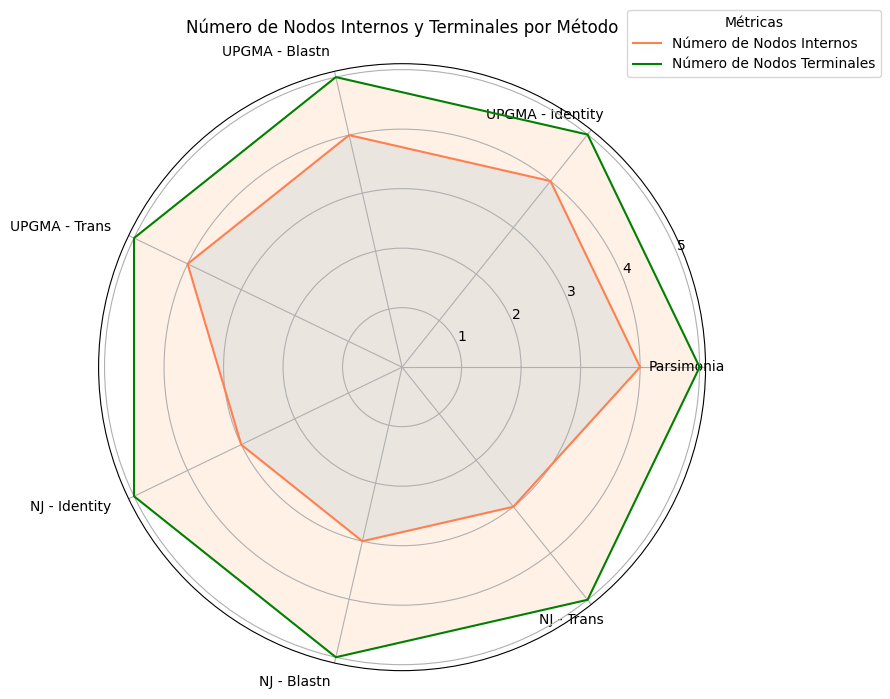

In [171]:
df_radar = df_metricas.loc[["Número de Nodos Internos", "Número de Nodos Terminales"]].astype(float).T
methods = df_radar.index
categories = df_radar.columns
N = len(categories)

angles = [n / float(len(methods)) * 2 * np.pi for n in range(len(methods))]
angles += angles[:1]
colors = {"Número de Nodos Internos": "coral", "Número de Nodos Terminales": "green"}

fig, ax = plt.subplots(figsize=(9.1, 9), subplot_kw={'polar': True})

for metrica in categories:
    values = df_radar[metrica].tolist()
    values += values[:1]
    ax.plot(angles, values, label=metrica, color=colors[metrica])
    ax.fill(angles, values, alpha=0.1)

ax.set_xticks(angles[:-1])
ax.set_xticklabels(methods, rotation=45, ha="right")
ax.set_title("Número de Nodos Internos y Terminales por Método", va="bottom")

plt.legend(loc="upper right", bbox_to_anchor=(1.3, 1.1), title="Métricas")
plt.tight_layout()
plt.show()


1. **Mayor complejidad estructural con Parsimonia y UPGMA**: Los métodos que utilizan Parsimonia y UPGMA producen árboles con mayor cantidad de nodos internos, lo cual sugiere una mayor resolución o subdivisión de las relaciones evolutivas.

2. **Métodos NJ son más simples**: La menor cantidad de nodos internos en los métodos NJ indica una topología más directa y menos subdivisiones evolutivas en los árboles generados.

El gráfico destaca diferencias importantes en la estructura de los árboles según el método utilizado, mostrando cómo cada algoritmo prioriza la complejidad topológica y la relación evolutiva entre las secuencias.

**4. Balance del Árbol**

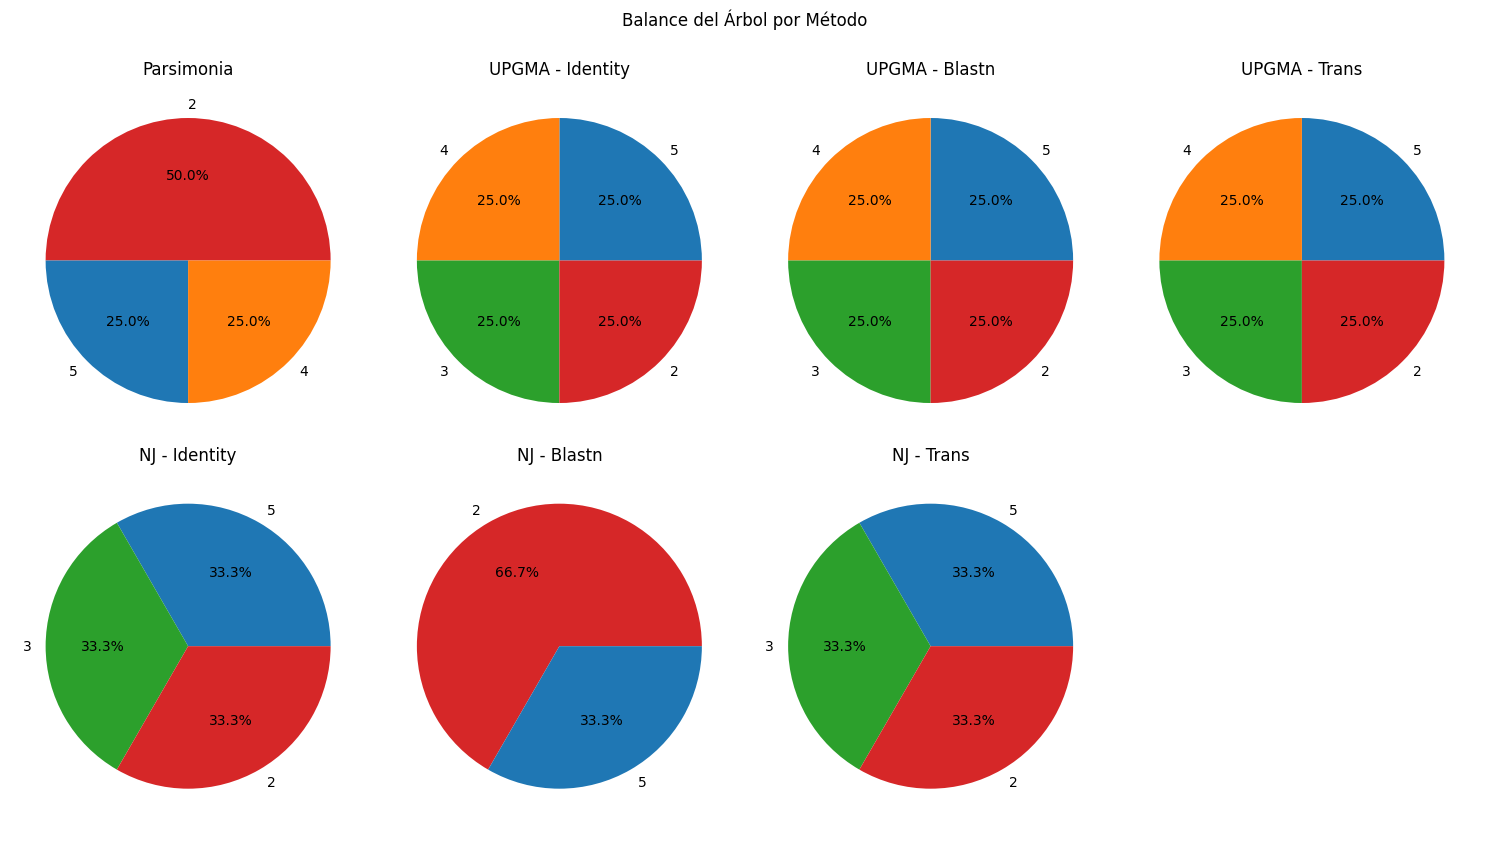

In [185]:
fig, axs = plt.subplots(2, 4, figsize=(15, 8))
axs = axs.flatten()

color_map = {5: 'tab:blue', 4: 'tab:orange', 3: 'tab:green', 2: 'tab:red'}

for i, (metodo, balance) in enumerate(df_metricas.loc["Balance del Árbol"].items()):
    if i >= len(axs):
        break
    counter_dict = eval(balance)
    colors = [color_map.get(key, 'gray') for key in counter_dict.keys()]
    axs[i].pie(counter_dict.values(), labels=counter_dict.keys(), autopct="%1.1f%%", colors=colors)
    axs[i].set_title(metodo)

axs[-1].axis('off')
plt.tight_layout()
plt.suptitle("Balance del Árbol por Método", y=1.05)
plt.show()

1. **Parsimonia y NJ - Blastn**: Estos métodos son más propensos a generar árboles desbalanceados, lo cual puede reflejar una alta disparidad en las tasas evolutivas entre diferentes linajes o una optimización específica en sus algoritmos.

2. **UPGMA**: Este método tiende a construir árboles altamente balanceados, reflejando su suposición de evolución uniforme y crecimiento simétrico.

3. **Diferencias entre NJ y UPGMA**: Neighbor Joining es más sensible a las disparidades evolutivas, lo que se observa en el caso de NJ - Blastn, mientras que UPGMA es más conservador y mantiene el equilibrio entre las ramas.

**5. Distancia promedio entre terminales por tipo de métodos**

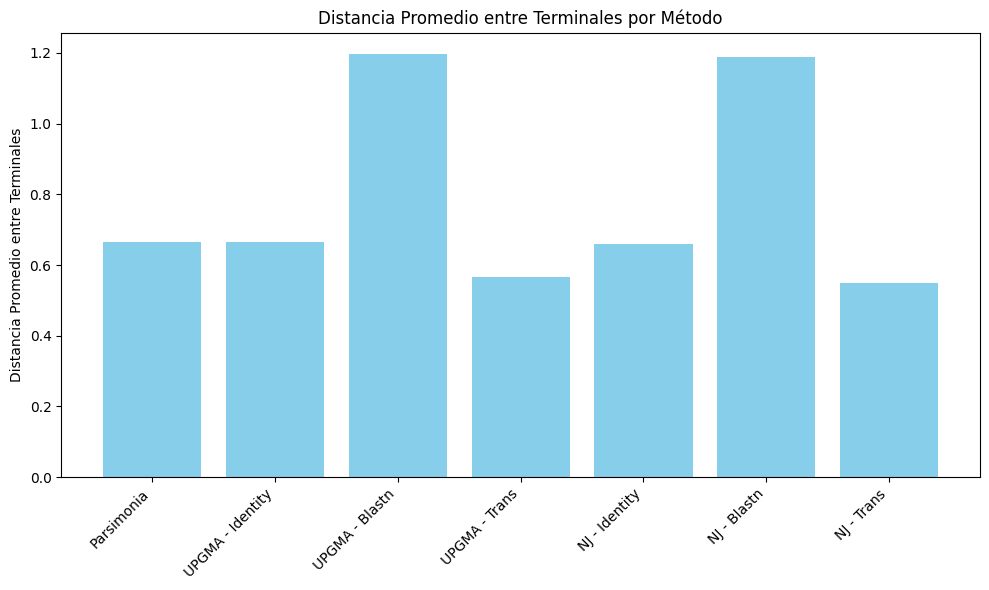

In [166]:
distancia_promedio = df_metricas.loc["Distancia Promedio entre Terminales"].astype(float)

plt.figure(figsize=(10, 6))
plt.bar(distancia_promedio.index, distancia_promedio, color="skyblue")
plt.ylabel("Distancia Promedio entre Terminales")
plt.title("Distancia Promedio entre Terminales por Método")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()

1. **Impacto del método**: Los métodos basados en Blastn (UPGMA y NJ) tienden a detectar mayor divergencia entre terminales, lo que podría ser útil en estudios donde las pequeñas diferencias entre secuencias son críticas. Métodos como Parsimonia e Identity son más conservadores y producen árboles con distancias promedio más moderadas.

2. **Simplicidad vs. complejidad**: Los métodos Trans generan los árboles más compactos, lo que podría reflejar una menor resolución en la identificación de diferencias entre secuencias.

3. **Aplicaciones prácticas**: Los métodos Blastn podrían ser preferidos en análisis donde se priorizan las diferencias evolutivas detalladas. Métodos como Parsimonia o Trans podrían ser más útiles en escenarios donde las secuencias son muy similares y se busca simplicidad en los árboles generados.

**6. Número de bifurcaciones**

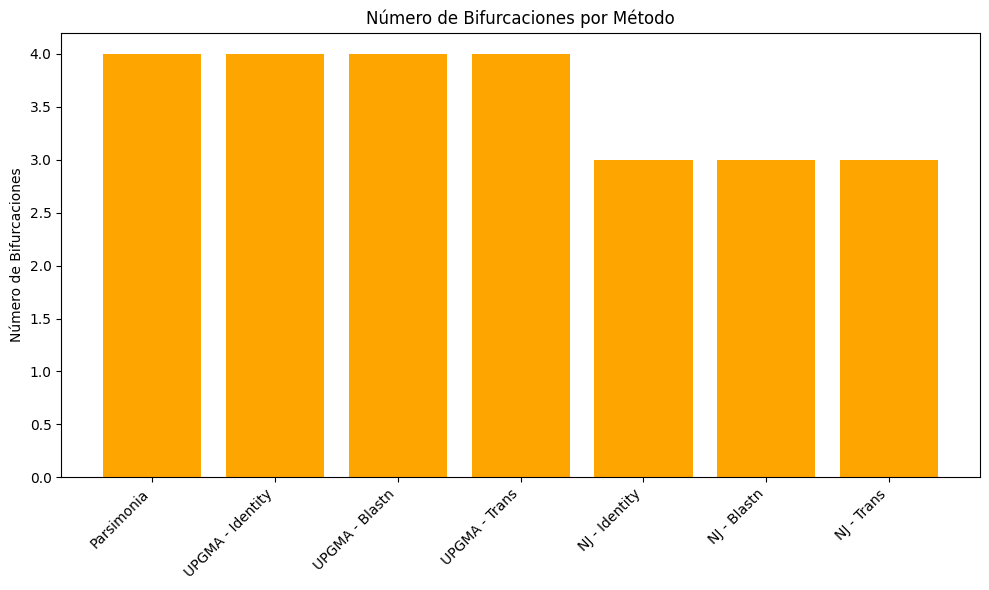

In [167]:
bifurcaciones = df_metricas.loc["Número de Bifurcaciones"].astype(int)

plt.figure(figsize=(10, 6))
plt.bar(bifurcaciones.index, bifurcaciones, color="orange")
plt.ylabel("Número de Bifurcaciones")
plt.title("Número de Bifurcaciones por Método")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()


1. **Resolución del árbol**: Parsimonia y UPGMA ofrecen mayor resolución (más bifurcaciones), lo cual es adecuado para análisis detallados de las relaciones evolutivas. NJ genera árboles más simples, lo que puede ser útil para una visión general de las relaciones.

2. **Puntos de especiación**: Un mayor número de bifurcaciones sugiere que los métodos Parsimonia y UPGMA identifican más puntos de especiación o divergencia evolutiva.

3. **Implicaciones metodológicas**: La elección entre UPGMA, Parsimonia y NJ depende del nivel de detalle requerido en el análisis filogenético. UPGMA y Parsimonia son ideales para estudios detallados, mientras que NJ es preferible para análisis más generales.

## 5. Conclusiones finales

1. **Comparación de Métodos**:  
   - **Parsimonia**: Produce árboles más conservadores con longitudes moderadas y un balance entre profundidad y número de bifurcaciones. Es ideal para datos simples y bien caracterizados.
   - **UPGMA**: Genera árboles balanceados y con menor profundidad, reflejando su asunción de una evolución uniforme. Es adecuado para análisis rápidos y conservadores.
   - **Neighbor Joining (NJ)**: Más sensible a variaciones evolutivas y divergencias, con árboles generalmente más largos y profundos. Es útil para representar datos con tasas evolutivas heterogéneas.

2. **Influencia de las Distancias**:  
   - Las distancias utilizadas (Blastn, Identity, Trans) afectan significativamente la interpretación de las relaciones evolutivas. Las distancias como Blastn tienden a generar árboles más largos y profundos, mientras que Identity y Trans producen estructuras más compactas y conservadoras.

3. **Efectos en los Parámetros de los Árboles**:  
   - Los parámetros como la profundidad máxima, el número de nodos internos/terminales, y las bifurcaciones varían dependiendo del método y las distancias empleadas. Esto destaca la importancia de seleccionar cuidadosamente el enfoque metodológico según los objetivos del análisis.

4. **Recomendaciones Generales**:  
   - **Para análisis detallados**: Métodos como Parsimonia y UPGMA con distancias más sensibles (Blastn) son útiles para capturar diferencias evolutivas finas.
   - **Para una visión general**: Métodos como NJ con distancias menos sensibles (Identity o Trans) pueden proporcionar árboles más simples y directos.

En resumen, los resultados demuestran que la aleatoriedad en los datos iniciales, junto con la elección del método y la distancia, influye profundamente en las conclusiones filogenéticas. Una aproximación combinada, utilizando múltiples métodos y distancias, ofrece una perspectiva más robusta y confiable de las relaciones evolutivas.